In [8]:
# Replicating Load Data logic

import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

path1 = Path("C:/Users/mca/Battery/batch1.pkl")
batch1 = pickle.load(open(path1, 'rb'))

#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())
numBat1

41

In [9]:
qd_sample = None
while not qd_sample:
    idx = np.random.choice(numBat1, 1)
    idx_key = "b1c" + str(*idx)
    print(idx_key)
    if idx_key in batch1.keys():
        qd_sample = batch1[idx_key]
idx_key

b1c7


'b1c7'

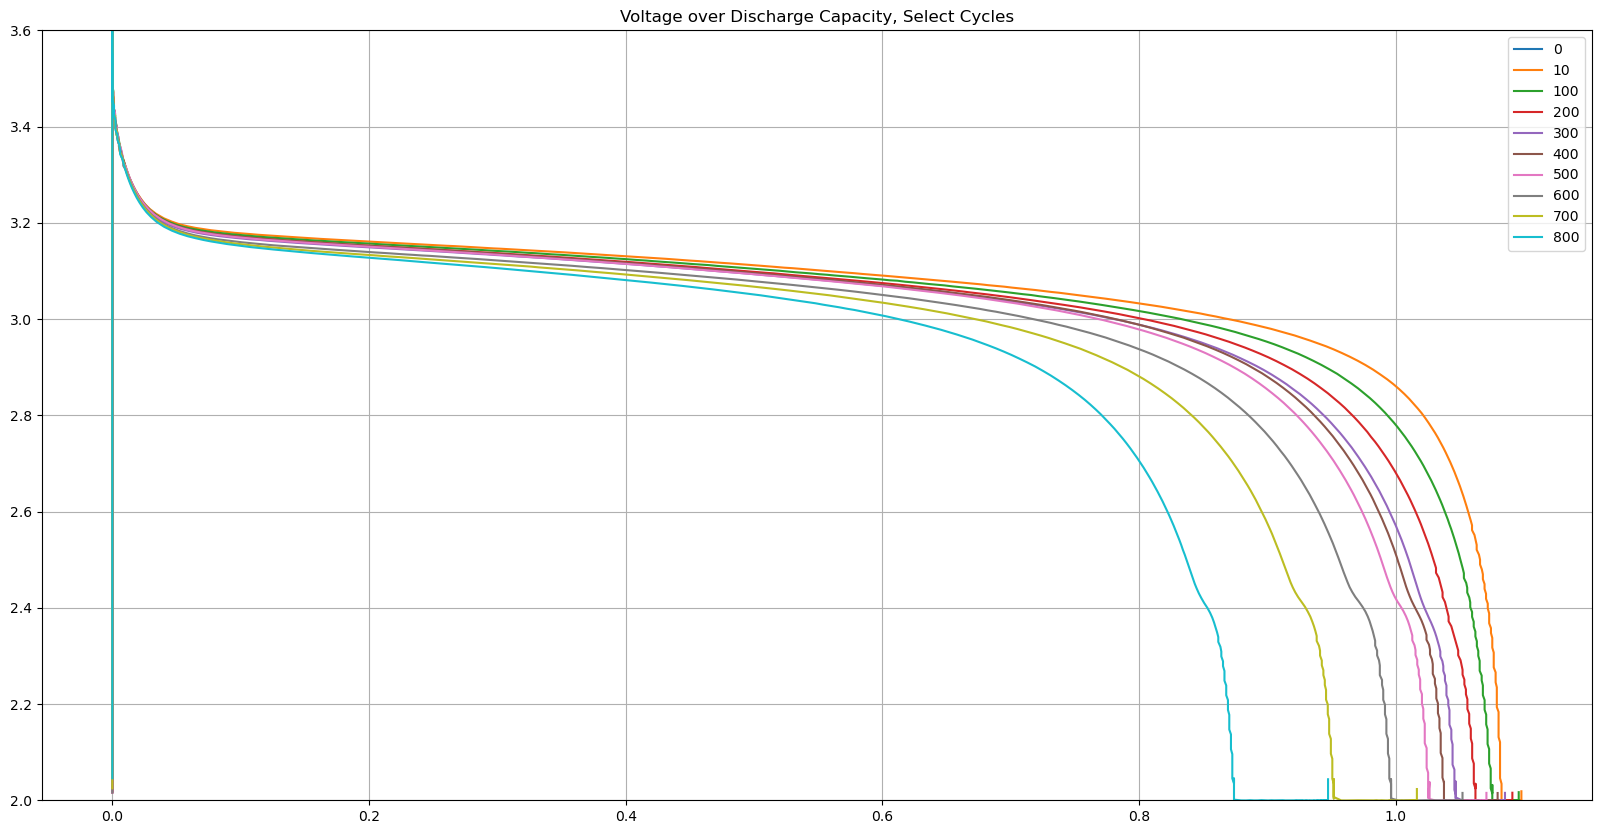

In [10]:
plt.figure(figsize=(20,10))
for i, cycle in qd_sample["cycles"].items():
    if (int(i)==10) | (int(i) % 100 == 0):
        plt.plot(cycle["Qd"], cycle["V"], label=i)
plt.title('Voltage over Discharge Capacity, Select Cycles')
plt.ylim(2,3.6)
plt.grid()
plt.legend()
plt.show()

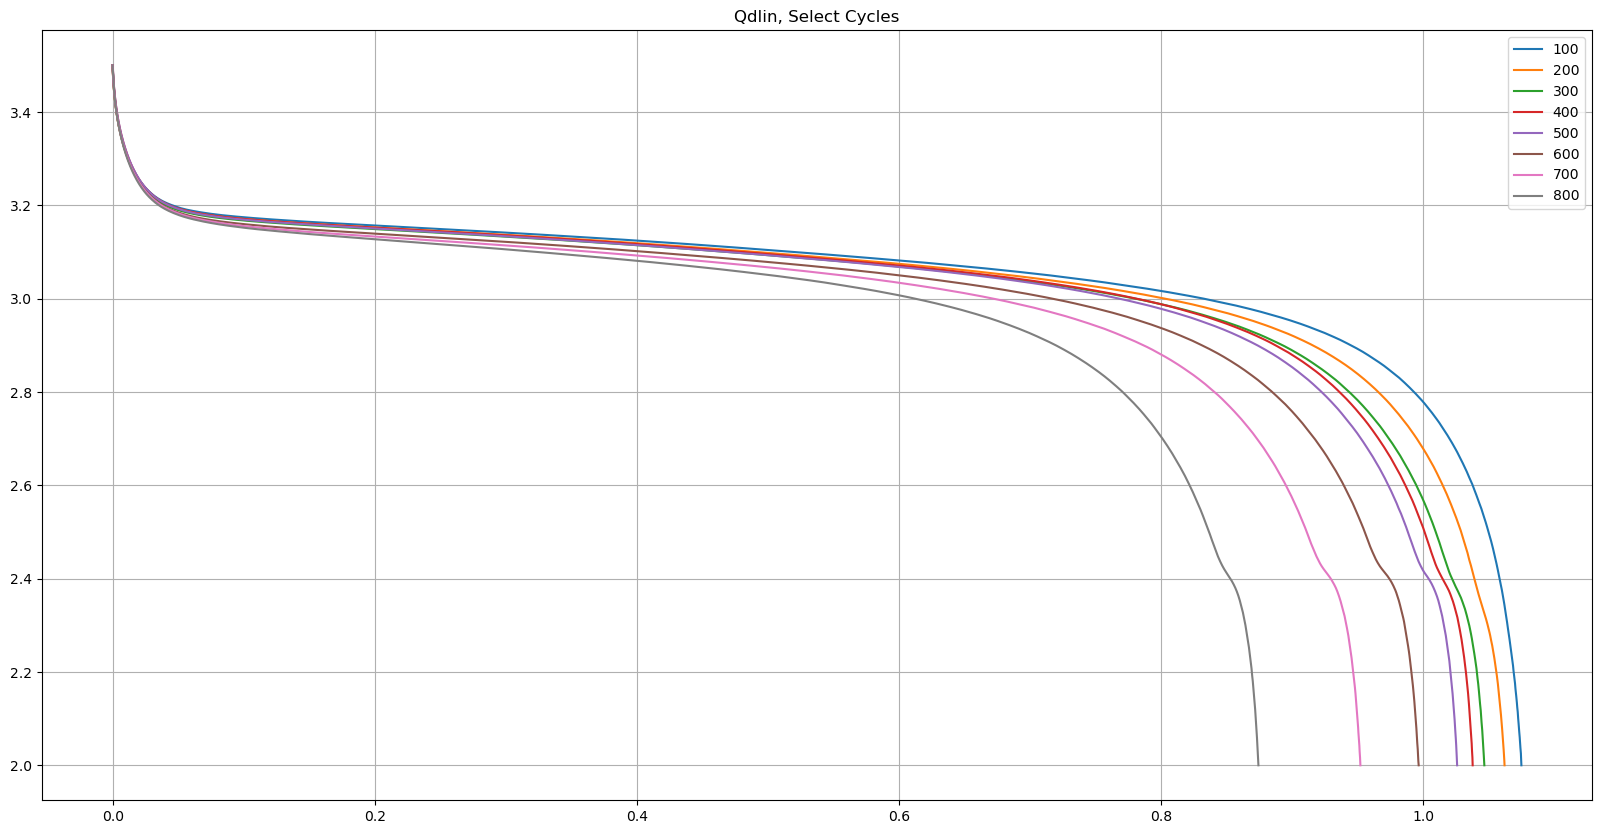

In [11]:
plt.figure(figsize=(20,10))
v_space = np.linspace(3.5, 2.0, 1000)
for i, cycle in qd_sample["cycles"].items():
    if (int(i)>0) & (int(i) % 100 == 0):
        plt.plot(cycle["Qdlin"], v_space, label=i)
plt.title('Qdlin, Select Cycles')
plt.grid()
plt.legend()
plt.show()

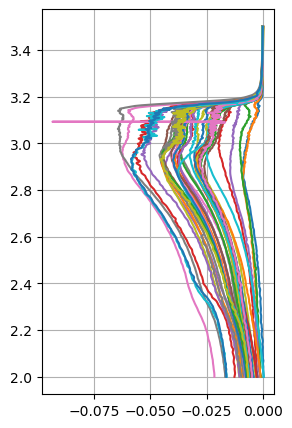

In [13]:
v_space = np.linspace(3.5,2,1000)   # does this make sense?
plt.figure(figsize=(3,5))
for cell in batch1.values():
    c10 = cell['cycles']['10']
    c100 = cell['cycles']['100']
    dQ_100_10 = c100['Qdlin'] - c10['Qdlin']
    plt.plot(dQ_100_10, v_space)
plt.grid()
plt.show()

NameError: name 'bat_dict' is not defined